In [9]:
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()

df = pd.read_csv('ALL_output_17ii.csv')
df = df[df['code'].isin(['A','B','C','D-E','F','G','H','I','J','K','L','M-N','O-U','TOT'])]

df.head()

,country,var,code,_1970,_1971,_1972,_1973,_1974,_1975,_1976,...,_2006,_2007,_2008,_2009,_2010,_2011,_2012,_2013,_2014,_2015
0,AT,VA,TOT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,237683.2,251926.6,260533.0,254762.6,262311.7,274852.3,281955.9,287194.6,294442.6,302653.1
2,AT,VA,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3494.2,4029.8,3946.8,3306.1,3761.9,4427.7,4330.3,4124.1,4033.7,3905.4
3,AT,VA,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1058.5,986.7,1345.3,1076.4,1179.3,1502.7,1515.9,1482.8,1452.6,1182.7
4,AT,VA,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,47702.3,51524.0,51051.5,47034.5,48983.1,51580.7,53382.5,53554.3,54581.6,57220.9
16,AT,VA,D-E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7574.5,7710.9,7937.8,8097.6,7970.3,7874.8,8250.0,8501.6,8211.9,7959.8


In [94]:
data = df.groupby(['country','var','code']).mean().stack().reset_index().rename(columns={'level_3':'year',0:'value'})
data['year'] = data['year'].str[1:].astype(int)

table = pd.pivot_table(data,index=['country','year'],columns=['var','code'],values='value')
table.head()

var                   CAP                                                      \
code                    A           B             C          D-E            F   
country year                                                                    
AT      1995 -2851.684753  281.859855  11118.769635  3778.291919  4098.870038   
        1996 -3182.049757  358.907700  11708.324478  4060.052670  4640.900503   
        1997 -3289.060893  378.537951  13064.054875  4016.374958  4407.100830   
        1998 -3254.092848  358.233251  13287.711310  4138.433617  4817.090695   
        1999 -3199.596786  385.430588  14438.510878  4081.744118  4866.190864   

var                                                                            \
code                    G            H            I            J            K   
country year                                                                    
AT      1995  6744.157730  2659.805905  1737.011968  2370.683290  3160.569334   
        1996  6721.737538  2731.243254  1615.608616  2380.659813  2911.569650   
        1997  7078.165623  3111.128174  1722.157417  2274.589061  3060.118031   
        1998  7300.330394  3642.485757  1963.458617  2440.234392  2875.362608   
        1999  7347.339930  3682.867477  2087.778926  2495.984997  2439.463442   

var           ...    VA_QI                                             \
code          ...        F        G        H        I       J       K   
country year  ...                                                       
AT      1995  ...  17778.1  25378.8  11905.7   9957.7  4823.7  5422.9   
        1996  ...  18217.2  25978.6  12284.7   9861.2  5250.3  5604.6   
        1997  ...  17982.6  26757.7  12840.9   9892.9  5310.4  6111.0   
        1998  ...  18517.9  27960.9  13814.0  10171.8  5722.0  6453.0   
        1999  ...  18691.6  28767.9  14294.0  10406.7  6153.1  7017.2   

var                                                          
code                L      M-N           O-U            TOT  
country year                                                 
AT      1995  18791.7  11989.0  44618.891530  193853.507609  
        1996  18478.0  12709.7  45153.277547  197610.111306  
        1997  18441.5  13212.7  45494.206817  201967.476851  
        1998  19265.9  13746.9  46710.798568  209798.031416  
        1999  19612.5  14524.6  47321.055176  216615.549438  

[5 rows x 560 columns]

In [132]:
share = pd.DataFrame(index=table.index,columns=['A','B','C','D-E','F','G','H','I','J','K','L','M-N','O-U','TOT'])
growth = pd.DataFrame(index=table.index,columns=['A','B','C','D-E','F','G','H','I','J','K','L','M-N','O-U','TOT'])

ind = ['A','B','C','D-E','F','G','H','I','J','K','L','M-N','O-U']

for i in df['country'].unique():
    growth.loc[i,:] = np.log(table.loc[i,'VA_QI']).diff().values
    share.loc[i,:] = table.loc[i,'VA'].div(table.loc[i,'VA']['TOT'],axis=0).rolling(2).mean().values

contrib = (growth*share).dropna().astype(float)

contrib.head()

A         B         C       D-E         F         G  \
country year                                                               
AT      1996  0.000034  0.000383  0.002136  0.000984  0.001978  0.003017   
        1997  0.000097 -0.000013  0.006433  0.001145 -0.001050  0.003804   
        1998  0.000986 -0.000052  0.005379  0.001733  0.002353  0.005660   
        1999  0.000883  0.000014  0.008781  0.000675  0.000745  0.003640   
        2000 -0.000693 -0.000012  0.012942  0.000763  0.000463  0.005136   

                     H         I         J         K         L       M-N  \
country year                                                               
AT      1996  0.001720 -0.000381  0.002845  0.001814 -0.001279  0.003467   
        1997  0.002430  0.000125  0.000378  0.004666 -0.000154  0.002393   
        1998  0.004107  0.001095  0.002509  0.002885  0.003466  0.002503   
        1999  0.001951  0.000914  0.002511  0.004203  0.001440  0.003561   
        2000  0.002314  0.001305  0.000146  0.006114  0.001695  0.004741   

                   O-U       TOT  
country year                      
AT      1996  0.002473  0.019193  
        1997  0.001556  0.021811  
        1998  0.005413  0.038039  
        1999  0.002662  0.031979  
        2000  0.002974  0.037886

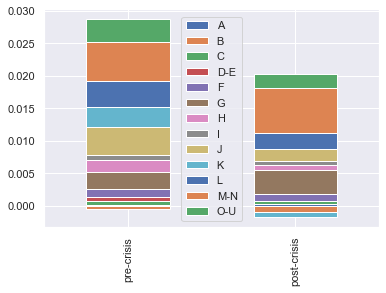

In [147]:
period = pd.DataFrame()

period.loc[:,'pre-crisis'] = contrib.loc['UK'].loc[1996:2007].mean()
period.loc[:,'post-crisis'] = contrib.loc['UK'].loc[2011:].mean()
period.T[ind].plot.bar(stacked=True)

A      0.000250
B     -0.001029
C      0.000476
D-E   -0.000028
F      0.001074
G      0.003631
H      0.000850
I      0.000585
J      0.001834
K     -0.000681
L      0.002550
M-N    0.006924
O-U    0.002061
TOT    0.018497
dtype: float64